In [2]:
import matplotlib
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from bisect import bisect

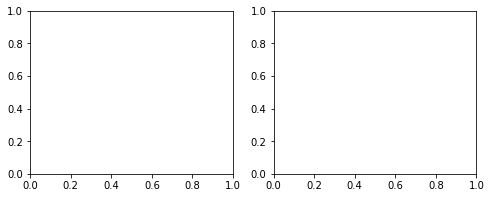

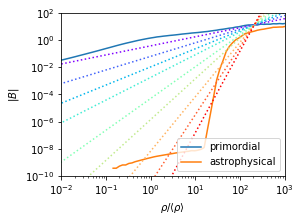

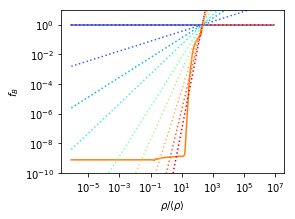

In [4]:
fig, axs = plt.subplots(1,2,figsize=(8,3))

fig, ax1 = plt.subplots(1,1,figsize=(4,3))
fig, ax2 = plt.subplots(1,1,figsize=(4,3))
axs=[ax1,ax2]


primordial = np.genfromtxt( '../../MHD-models/clues/rho2B_primordial_median.txt', names=True )
rho = primordial['density']
B = primordial['B']*1e12
axs[0].loglog(rho, B, label='primordial')

astrophysical = np.genfromtxt( '../../MHD-models/clues/rho2B_astrophysical_median.txt', names=True )
rho_ = astrophysical['density']
B_ = astrophysical['B']*1e13
axs[0].loglog(rho_, B_, label='astrophysical')
axs[0].set_xlim(1e-2,1e3)

primordial = np.genfromtxt( '../../MHD-models/clues/2018/B_renorm_primordial.txt', names=True )
rho = primordial['density']
f = primordial['Renorm']
axs[1].plot(rho, f)

astrophysical = np.genfromtxt( '../../MHD-models/clues/2018/B_renorm_astrophysical_median.txt', names=True )
rho = astrophysical['density']
f = astrophysical['Renorm']
axs[1].plot(rho, f)


# density, above which B is known, i. e. is the same throughout all scenarios
rho0 = 2e2
i_0 = bisect(rho, rho0)
rho_0 = rho[i_0]
B_0 = B[i_0]

B0 = 0.37741931768118864
B = rho**(2./3) * B0
alphas = [2./3, 3./3, 4./3]
alphas = np.arange(2./3, 6.1, 1./3)
alphas = np.array([2,3,4,5,7,9,12,15,18], dtype=float) / 3
colors = rainbow( np.linspace(0,1,len(alphas)) )
for alpha, color in zip(alphas,colors):
    B0 = B_0/rho_0**alpha
    B_ = rho**alpha * B0
    axs[0].loglog(rho, B_, linestyle=':', color=color )# , label=r"$\alpha$ = %.1f" % alpha)
    axs[1].loglog(rho, B_/B, linestyle=':', color=color )# , label=r"$\alpha$ = %.1f" % alpha)

axs[0].legend()
#axs[1].legend()
axs[0].set_ylim(1e-10,100)
axs[1].set_ylim(1e-10,10)
axs[0].set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[1].set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[0].set_ylabel(r"$|B|$")
axs[1].set_ylabel(r"$f_B$")

plt.show()

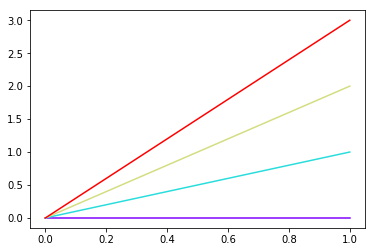

In [71]:
N=4
colors= rainbow(np.linspace(0,1,N))
for i in range(N):
    plt.plot( [0,1],[0,i], color=colors[i] )